In [262]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

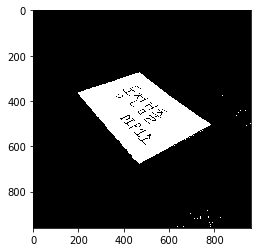

In [263]:
#image 흑백처리, 이진화 (그냥 Threshold)

img = cv2.imread('images/money_char.jpg')
img_ori = img.copy()
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)


#배경과 종이의 색감 차이에 따라 threshold값 다르게 줄 것 (평균 170)
ret_threshold, binary_img = cv2.threshold(img_gray, 200, 255, cv2.THRESH_BINARY_INV)
#A4를 쓸 경우 활성화 
binary_img=cv2.bitwise_not(binary_img)


plt.imshow(binary_img, cmap='gray')

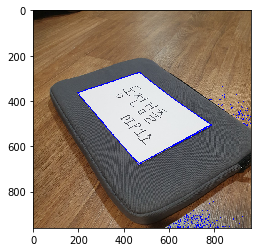

In [271]:
#contour을 찾고 A4용지의 외곽선 그리기
img, contour, hierarchy = cv2.findContours(binary_img, 
                                            cv2.RETR_EXTERNAL, 
                                            cv2.CHAIN_APPROX_SIMPLE)

img = img_ori.copy()

# Draw Contour with Blue
cv2.drawContours(img, contour, -1, (255,0,0), 3)
plt.figure()
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

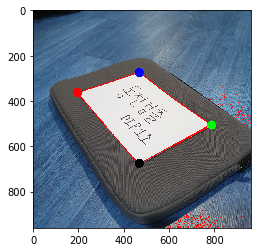

In [272]:
#그려진 외곽선을 바탕으로 꼭짓점 찾기 (perspective point)

cnt=contour[-1]

#좌표점의 순서는 빨->검->파->녹
leftmost = tuple(cnt[cnt[:,:,0].argmin()][0])
rightmost = tuple(cnt[cnt[:,:,0].argmax()][0])
topmost = tuple(cnt[cnt[:,:,1].argmin()][0])
bottommost = tuple(cnt[cnt[:,:,1].argmax()][0])

# 좌표 표시하기
cv2.circle(img,leftmost,20,(255,0,0),-1) #빨강
cv2.circle(img,rightmost,20,(0,255,0),-1) #녹색
cv2.circle(img,topmost,20,(0,0,255),-1) #파랑
cv2.circle(img,bottommost,20,(0,0,0),-1) #겸정

img = cv2.drawContours(img, cnt, 2, (0,0,255), 5)

plt.imshow(img)

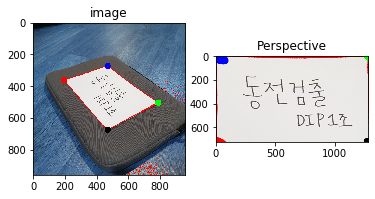

In [273]:
#prospective Transform
pts1 = np.float32([topmost,leftmost,rightmost,bottommost])

# 좌표의 이동점
pts2 = np.float32([[0,0],[0,720],[1280,0],[1280,720]])

M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (1280,720))


plt.subplot(121),plt.imshow(img),plt.title('image')
plt.subplot(122),plt.imshow(dst),plt.title('Perspective')
plt.show()

cv2.imshow('img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [267]:
cv2.imwrite('result.jpg',dst)

True